# MNIST DATASET

In [1]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference
from tuning_utils import tuning_hyper_parameter
from vis_utils import visualize_grid_withoutRGB, visualize_grid

# Linear algebra library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
from vis_utils import visualize_grid_withoutRGB, visualize_grid
def show_net_weights(net, Wkey):
    plt.figure(figsize=(7,7))
    W1 = net.function_params[Wkey]
    Z, N = W1.shape
    size = int(np.sqrt(Z))
    W1 = W1.reshape(size, size,-1).transpose(2,0,1)
    print(W1.shape)
    plt.imshow(visualize_grid_withoutRGB(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

In [3]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,100*np.max(predictions_array),true_label),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## Loading dataset

In [4]:
# Loading digits dataset
from scipy.io import loadmat
from mlxtend.data import loadlocal_mnist
digits_image_path = 'data/mnist-dataset/train_images'
digits_labels_path = 'data/mnist-dataset/train_labels'
test_image_path = 'data/mnist-dataset/test_images'
test_labels_path = 'data/mnist-dataset/test_labels'
train_images, train_labels = loadlocal_mnist(images_path= digits_image_path, 
                                 labels_path = digits_labels_path)
test_images, test_labels = loadlocal_mnist(images_path = test_image_path, 
                                           labels_path = test_labels_path)

In [5]:
# shape of the images
print(f'shape of train_images dataset : {train_images.shape}')
print(f'shape of train_labels dataset : {train_labels.shape} ')
print(f'shape of test_images dataset : {test_images.shape}')
print(f'shape of test_labels dataset : {test_labels.shape} ')

shape of train_images dataset : (60000, 784)
shape of train_labels dataset : (60000,) 
shape of test_images dataset : (10000, 784)
shape of test_labels dataset : (10000,) 


In [6]:
num_samples, pixels_square = train_images.shape
pixel_size = int(np.sqrt(pixels_square))
train_images = train_images.reshape(num_samples, pixel_size, pixel_size)
print(train_images.shape)
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## Showing some Images

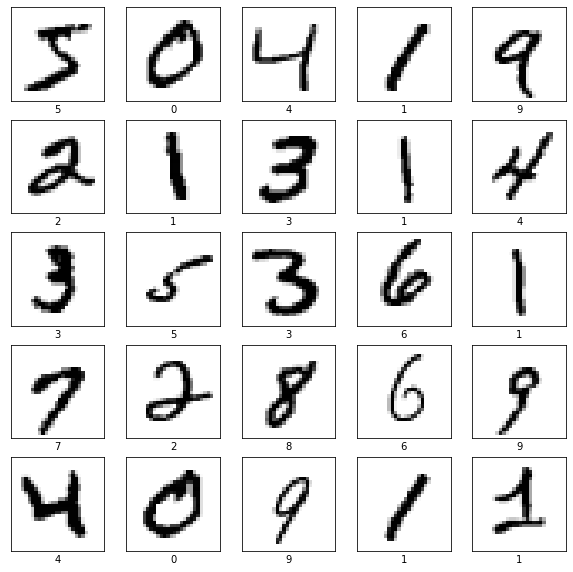

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Prepare the data

In [8]:
train_images = train_images.reshape(num_samples, pixel_size, pixel_size)
print(train_images.shape)
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print(test_images.shape)
# X = images - np.mean(images, axis = 0) 
# Normalize the data is very important for fastest converge
# X_val = images_test - np.mean(images, axis = 0)
X = train_images
X_val = test_images
X_val = X_val.reshape(X_val.shape[0], -1)
X = X.reshape(num_samples, -1)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
y = train_labels
y_val = test_labels

# Train a model


In [15]:
reg = 1.368237005238921
net_params = {'il': 784, 'hl1': 225, 'ol': 10}
# activ_function = 'Sigmoid'
# cost_function = 'Entropy_Loss'
activ_function = 'ReLu'
cost_function = 'SoftMax'
lr = 0.0005
max_iter = 5000
net = neural_net(net_params=net_params, activation_function=activ_function,
                cost_function=cost_function, std = 1e-4)
results = net.train_stochastic_gradient_descent(X, y, X_val, y_val,
                                                learning_rate = lr, reg = reg,
                                               max_iter = max_iter, batch_size = 200,
                                               verbose = True, epoch = 200)

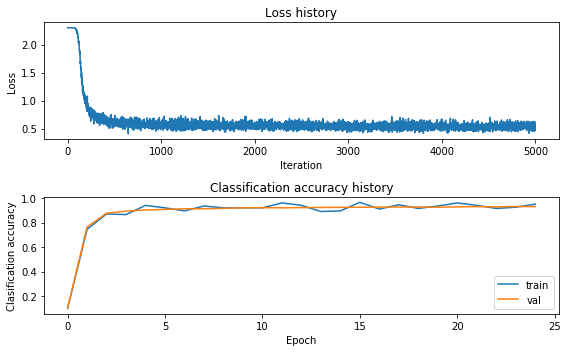

In [16]:
plotStats(results)

In [17]:
y_pred = net.predict(X)
print(f'{(y_pred == y).mean() * 100}')
y_pred_val, y_score_val = net.predict(X_val, with_score=True)
print(f'{(y_pred_val == y_val).mean() * 100}')

92.82166666666667
92.97999999999999


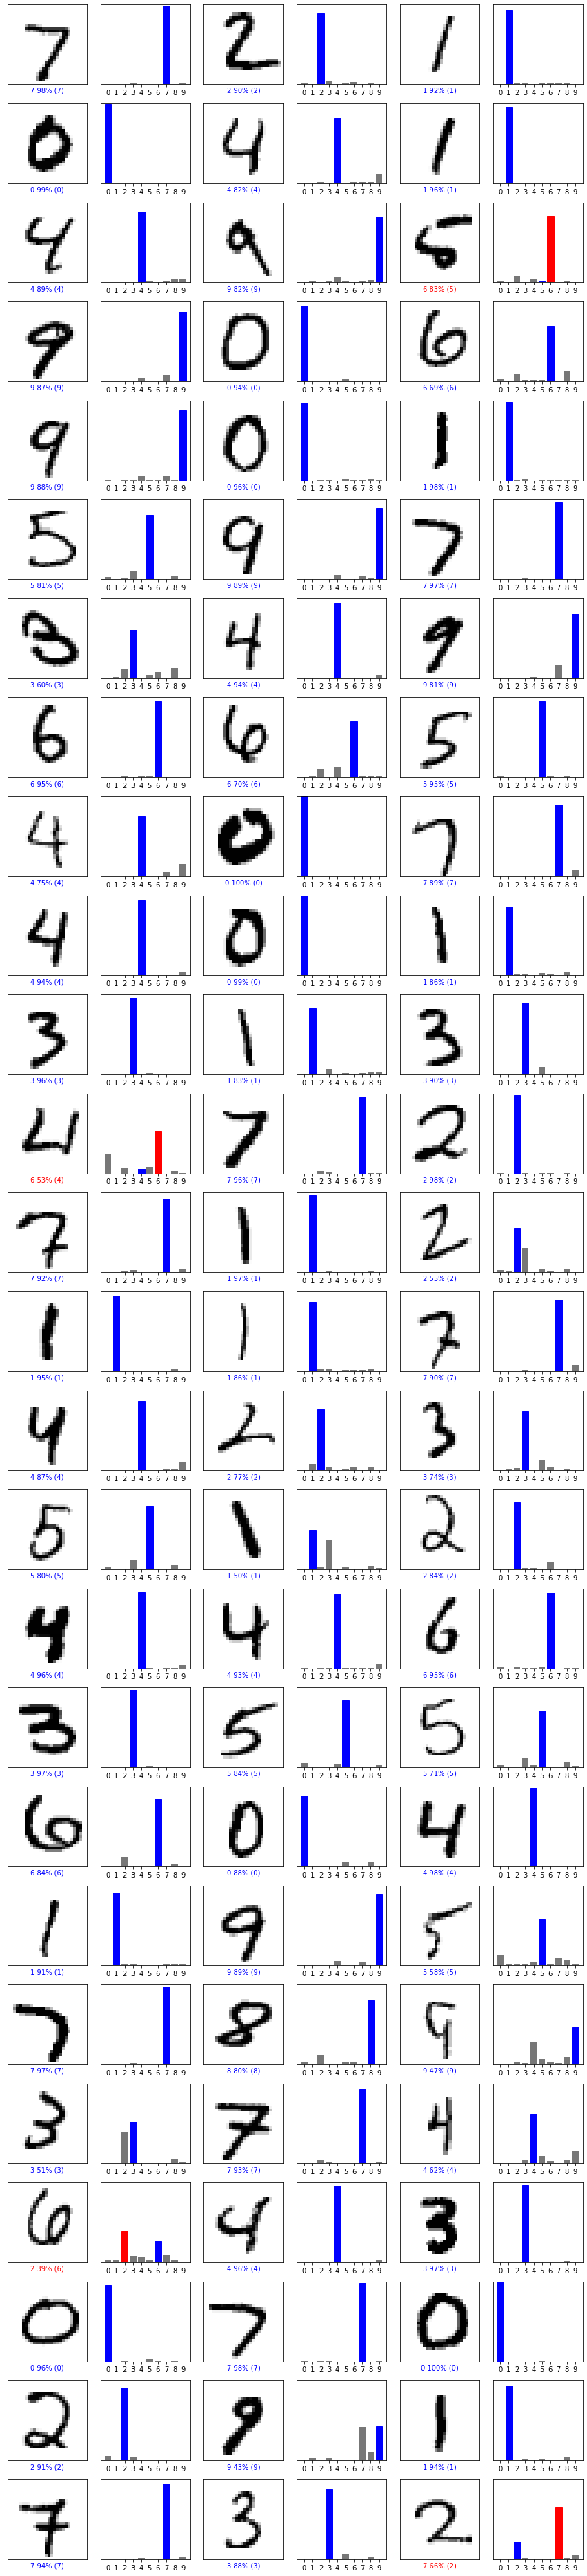

In [18]:
num_rows = 26
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_score_val[i], y_val, X_val.reshape(len(y_val), 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_score_val[i], y_val)
plt.tight_layout()
plt.show()

(225, 28, 28)


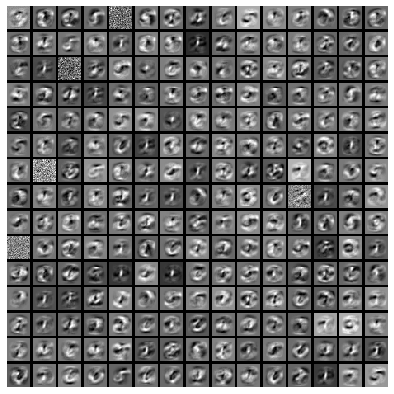

In [19]:
show_net_weights(net, 'W1')